In [1]:
import pandas as pd
import numpy as np
import os
import subprocess

In [2]:
os.chdir('/home/ars1suhod/ncbi')

In [3]:
df = pd.read_csv('assembly_summary_genbank.txt', delimiter='\t')

In [4]:
df = df.fillna(0)

In [5]:
df = df[df['taxid'] != 0]

In [6]:
print(df)

       assembly_accession   bioproject     biosample      wgs_master  \
0         GCA_000001215.4   PRJNA13812  SAMN02803731               0   
1        GCA_000001405.29   PRJNA31257             0               0   
2         GCA_000001515.5   PRJNA13184  SAMN02981217  AACZ00000000.4   
3         GCA_000001545.3   PRJNA20869  SAMN02981238  ABGA00000000.1   
4         GCA_000001635.9   PRJNA20689             0               0   
...                   ...          ...           ...             ...   
155601    GCA_003312975.1  PRJNA430462  SAMN08374142  PPSP00000000.1   
155602    GCA_003312995.1  PRJNA430462  SAMN08374129  PQCT00000000.1   
155603    GCA_003313015.1  PRJNA479572  SAMN09580377  QNVM00000000.1   
155604    GCA_003313035.1  PRJNA472895  SAMN09253947  QHCV00000000.1   
155605    GCA_003313055.1  PRJNA454572  SAMN09010700  QGOB00000000.1   

              refseq_category      taxid  species_taxid  \
0            reference genome     7227.0         7227.0   
1            refe

In [7]:
dict_taxid = {}
with open('out.txt', 'r') as out:
    for line in out:
        try:
            dict_taxid.setdefault('taxid', [])
            dict_taxid.setdefault('taxi', [])
            dict_taxid['taxid'].append(np.float64(line.split(' ')[0].split('\t')[0]))
            dict_taxid['taxi'].append(line.split(' ')[1].split(';')[1])
        except IndexError:
            #print(line)
            dict_taxid['taxi'].append(line.split('\t')[1].split(';')[0])

In [8]:
df_taxid = pd.DataFrame(dict_taxid)

In [9]:
df['taxi'] = df_taxid['taxi']

In [10]:
df_bacteria = df[df['taxi'] == 'Bacteria']
df_arc = df[df['taxi'] == 'Archaea']

In [11]:
df_bacteria.index = [i for i in range (len(df_bacteria))]

In [12]:
print(df_bacteria)

       assembly_accession   bioproject     biosample      wgs_master  \
0         GCA_000003135.1   PRJNA31437  SAMN00001475  ACHI00000000.1   
1         GCA_000003215.1   PRJNA20093  SAMN02470531  ABFD00000000.2   
2         GCA_000003645.1   PRJNA29657  SAMN00717290  ACLS00000000.1   
3         GCA_000003925.1   PRJNA29701  SAMN00727646  ACMU00000000.1   
4         GCA_000003955.1   PRJNA29699  SAMN00727677  ACMT00000000.1   
...                   ...          ...           ...             ...   
128051    GCA_003312945.1  PRJNA479571  SAMN09580376  QNVL00000000.1   
128052    GCA_003312975.1  PRJNA430462  SAMN08374142  PPSP00000000.1   
128053    GCA_003312995.1  PRJNA430462  SAMN08374129  PQCT00000000.1   
128054    GCA_003313015.1  PRJNA479572  SAMN09580377  QNVM00000000.1   
128055    GCA_003313035.1  PRJNA472895  SAMN09253947  QHCV00000000.1   

              refseq_category      taxid  species_taxid  \
0                          na   548480.0       216816.0   
1                

In [13]:
print(df_bacteria['refseq_category'][0])

na


In [14]:
count = 0
mist_list = []

In [15]:
stats_counter = 0
home = '/home/ars1suhod/ncbi/stats_bac'
os.chdir(home)
for root, dirs, files in os.walk(os.getcwd()):
    for filename in files:
        stats_counter += 1
print(stats_counter)

11568


In [16]:
l = []
home = '/home/ars1suhod/ncbi/stats_bac'
for root, dirs, files in os.walk(home):
    for dire in dirs:
        l.append(dire)

In [17]:
print(len(l))

5750


In [18]:
def start_end(file, start_stop_dict):
    #old_end = 0
    #old_gene = ''
    with open(file, 'r') as bsubt:
        for line in bsubt:
            if '>' in line:
                try:
                    gene = line.split(" ")[0]
                    loc = line.split('location=')[1].split(']')[0]
                    if('complement') in loc:
                        if ('join(') in loc:
                            start = loc.split('join(')[1].split('..')[0]#.replace("<", "")
                            #start = start.replace(">", "")
                            end = loc.split('join(')[1].split('..')[2].split(')')[0]#.replace("<", "")
                            #end = end.replace(">", "")
                        else:
                            raw_start = loc.split('..')[0]
                            raw_end = loc.split('..')[1]
                            start = raw_start.split('(')[1]#.replace("<", "")
                            #start = start.replace(">", "")
                            end = raw_end.split(')')[0]#.replace("<", "")
                            #end = end.replace(">", "")
                    elif ('join(' in loc and 'complement' not in loc):
                        start = loc.split('join(')[0].split('..')[0].replace("<", "")
                        start = start.replace(">", "")
                        end = loc.split('join(')[0].split('..')[2].split(')')[0].replace("<", "")
                        end = end.replace(">", "")
                    else:
                        start = loc.split('..')[0]#.replace("<", "")
                        #start = start.replace(">", "")
                        end = loc.split('..')[1]#.replace("<", "")
                        #end = end.replace(">", "")
                    x = int(start)
                    y = int(end)
                    start_stop_dict.setdefault(gene, [])
                    start_stop_dict[gene].append(x)
                    start_stop_dict[gene].append(y)
                except Exception:
                    #print('StartEnd Error')
                    continue

In [84]:
def reverser(file, reverser_dict):
    old_end = 0
    old_start = 0
    old_gene = ''
    count = 0
    with open(file, 'r') as bsubt:
        for line in bsubt:
            if '>' in line:
                try:
                    loc = line.split('location=')[1].split(']')[0]
                    if('complement') in loc:
                        if ('join(') in loc:
                            try:
                                start = int(loc.split('join(')[1].split('..')[0])
                                #start = int(start.replace(">", ""))
                                end = int(loc.split('join(')[1].split('..')[2].split(')')[0])#.replace("<", "")
                                #end = int(end.replace(">", ""))
                            except Exception:
                                continue
                        else:
                            raw_start = loc.split('..')[0]
                            raw_end = loc.split('..')[1]
                            start = int(raw_start.split('(')[1])#.replace("<", "")
                            #start = int(start.replace(">", ""))
                            end = int(raw_end.split(')')[0])#.replace("<", "")
                            #end = int(end.replace(">", ""))
                        if (old_end < start):
                            reverser_dict[start] = end
                            old_start = start
                        else:
                            reverser_dict[old_start] = end
                        old_end = end
                except Exception:
                    count += 1
                    if (file == 'GCA_000008865.2_ASM886v2_cds_from_genomic.fna'):
                        print(count)
                    #print('Reverse error')
                    continue

In [20]:
def genome_to_string(l, file):
    with open(file, 'r') as sequence:
        for line in sequence:
            if '>' not in line and 'Gene' not in line:
                l += line.split('\n')[0]
    return l

In [21]:
def complement(sequence):
    comp_dict = {"A":"T",
                 "T":"A",
                 "G":"C",
                 "C":"G",
                 "a":"t",
                 "t":"a",
                 "g":"c",
                 "c":"g",
                 "N":"N",
                 "n":"n",
                 "W":"W",
                 "w":"w",
                 "S":"S",
                 "s":"s",
                 "R":"Y",
                 "r":"y",
                 "Y":"R",
                 "y":"r",
                 "K":"M",
                 "M":"K",
                 "m":"k",
                 "k":"m",
                 "D":"D",
                 'H':'H',
                 'B':'B',
    }
    string = ''
    sequence_list = list(sequence)
    sequence_list = [comp_dict[base] for base in sequence_list]
    string = ''.join(sequence_list)
    return string

In [22]:
def intersection(start_stop_dict, reverser_dict, g, inter_dict):
    flag = 0
    for gene in start_stop_dict:
        info = start_stop_dict[gene]
        new_gene = info[0]
        start = int(info[1])
        end = int(info[2])
        inter_seq = g[start - 21 : start - 1].lower() + g[start - 1 : end] + g[end : end + 20].lower()
        for key in reverser_dict:
            if start > key and start < reverser_dict[key]:
                flag = 1
        if flag == 1:
            inter_seq = inter_seq[::-1]
        inter_dict[gene] = []
        inter_dict[gene].append(new_gene)
        inter_dict[gene].append(inter_seq)
        flag = 0
    return 0

In [23]:
def write_result(file, inter_dict):
    count = 0
    with open(file, 'w') as out_file:
        for key in inter_dict:
            if len(inter_dict[key][1]) <= 50:
                out_file.write(key + '\t')
                out_file.write(inter_dict[key][0] + '\t')
                out_file.write(inter_dict[key][1])
                out_file.write('\n')
                count += 1
    #print(count)

In [85]:
stats_list = []
for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
    for directory in dirs:
        os.chdir('/home/ars1suhod/ncbi/genomes/')
        if (directory not in stats_list):
            raw_start_stop_dict = {}
            raw_reverser_dict = {}
            inter_dict = {}
            l = ''
            count = 0
            os.chdir('/home/ars1suhod/ncbi/genomes/' + directory)
            for root_new, dirs_new, files_new in os.walk('/home/ars1suhod/ncbi/genomes/' + directory):
                for filename in files_new:
                    if ('cds' in filename):
                        cds_file = filename
                        count += 1
                    elif ('genomic' in filename):
                        genome_file = filename
                        count += 1
            if (count == 2):
                stats_list.append('/home/ars1suhod/ncbi/genomes/' + directory)
                start_end(cds_file, raw_start_stop_dict)
                reverser(cds_file, raw_reverser_dict)
                if directory == 'Escherichia coli':
                    print(' ')
                l = genome_to_string(l, genome_file)
                g = ''
                raw_start_stop_dict = dict(sorted(raw_start_stop_dict.items(), key = lambda item: item[1]))
                start_stop_dict = {}
                old_end = 0
                old_gene = ''
                for key in (raw_start_stop_dict.keys()):
                    #print(key)
                    start = raw_start_stop_dict[key][0]
                    end = raw_start_stop_dict[key][1]
                    gene = key
                    if (int(old_end) > int(start)):
                        start_stop_dict.setdefault(old_gene, [])
                        start_stop_dict[old_gene].append(gene)
                        start_stop_dict[old_gene].append(int(start))
                        start_stop_dict[old_gene].append(int(old_end))
                    old_end = end
                    old_gene = gene
                old_end = 0
                old_start = 0
                raw_reverser_dict = dict(sorted(raw_reverser_dict.items()))
                reverser_dict = {}
                for key in (raw_reverser_dict.keys()):
                    start = key
                    end = raw_reverser_dict[key]
                    if (old_end < start):
                        reverser_dict[start] = end
                        old_start = start
                    else:
                        reverser_dict[old_start] = end
                    old_end = end
                old_end = 0
                old_start = 0
                for key in reverser_dict:
                    g += l[old_start:key - 1]
                    comp = complement(l[key - 1:reverser_dict[key]])
                    g += comp
                    old_start = reverser_dict[key]
                g += l[old_start:len(l)]
                intersection(start_stop_dict, reverser_dict, g, inter_dict)
                result_name = directory + '_intersection.tsv'
                write_result(result_name, inter_dict)

1
2
 


In [26]:
print(complement('gccctggtggactcgattatTCATtgggtgttaacaatcatttt'))

cgggaccacctgagctaataAGTAacccacaattgttagtaaaa


In [ ]:
print(os.getcwd())

In [52]:
stats_list = []
for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
    for file in files:
        if ('intersection.tsv' in file):
            stats_list.append(file.split('_intersection')[0])

In [53]:
import csv

In [54]:
good_start = ['ATG', 'GTG', 'TTG']
good_end = ['TAG', 'TAA', 'TGA']
print(good_start)
print(good_end)
list_start = [0, 0, 0, 0, 0, 0, 0, 0, 0]
list_stop = [0, 0, 0]

['ATG', 'GTG', 'TTG']
['TAG', 'TAA', 'TGA']


In [55]:
with open('/home/ars1suhod/ncbi/stats.tsv', 'wt') as out_file:
    os.chdir('/home/ars1suhod/ncbi/genomes')
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
        for directory in dirs:
            try:
                file = directory + '/' + directory + '_intersection.tsv'
                bsubt = pd.read_csv(file, delimiter='\t', header = None)
                sequence_dict = {}
                full_dict = {}
                full_sequence_dict = {}
                if (len(bsubt) < 20):
                    continue
                for i in range(len(bsubt)):
                    gene = bsubt[0][i]
                    sequence = bsubt[2][i]
                    num = len(sequence)
                    start = sequence[20:23]
                    end = sequence[num - 23: num - 20]
                    if (start == 'ATG' and end == 'TAG'):
                        list_start[0] += 1
                    if (start == 'ATG' and end == 'TAA'):
                        list_start[1] += 1
                    if (start == 'ATG' and end == 'TGA'):
                        list_start[2] += 1
                    if (start == 'GTG' and end == 'TAG'):
                        list_start[3] += 1
                    if (start == 'GTG' and end == 'TAA'):
                        list_start[4] += 1
                    if (start == 'GTG' and end == 'TGA'):
                        list_start[5] += 1
                    if (start == 'TTG' and end == 'TAG'):
                        list_start[6] += 1
                    if (start == 'TTG' and end == 'TAA'):
                        list_start[7] += 1
                    if (start == 'TTG' and end == 'TGA'):
                        list_start[8] += 1
            except Exception:
                continue
print(list_start)
#print(list_stop)

[5483, 17836, 203711, 880, 1826, 55720, 427, 1272, 9668]


In [38]:
import os
import csv
import pandas as pd
nucleotide_list = [0, 0, 0, 0]
with open('/home/ars1suhod/ncbi/stats.tsv', 'wt') as out_file:
    os.chdir('/home/ars1suhod/ncbi/genomes')
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
        for directory in dirs:
            try:
                file = directory + '/' + directory + '_intersection.tsv'
                #print(file)
                bsubt = pd.read_csv(file, delimiter='\t', header = None)
                sequence_dict = {}
                full_dict = {}
                full_sequence_dict = {}
                if (len(bsubt) < 20):
                    continue
                for i in range(len(bsubt)):
                    gene = bsubt[0][i]
                    sequence = bsubt[2][i]
                    num = len(sequence)
                    start = sequence[20:23]
                    end = sequence[num - 23: num - 20]
                    if(start in good_start and end in good_end):
                        if(len(sequence) > 46):
                            #print(gene)
                            #print(sequence)
                            #print(sequence[23: num - 23])
                            for s in sequence[23: num - 23]:
                                if (s == 'A'):
                                    nucleotide_list[0] += 1
                                if (s == 'T'):
                                    nucleotide_list[1] += 1 
                                if (s == 'G'):
                                    nucleotide_list[2] += 1 
                                if (s == 'C'):
                                    nucleotide_list[3] += 1 
            except Exception:
                continue
print(nucleotide_list)

[32112, 18066, 26306, 31023]


In [39]:
summa = sum(nucleotide_list)
print(summa)
for i in range(4):
    nucleotide_list[i] /= summa
print(nucleotide_list)

107507
[0.29869682904369016, 0.16804487149673974, 0.24469104337391984, 0.28856725608565026]


In [41]:
import seaborn as sns

/home/ars1suhod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Нуклеотиды'), Text(0, 0.5, 'Процентное соотношение')]

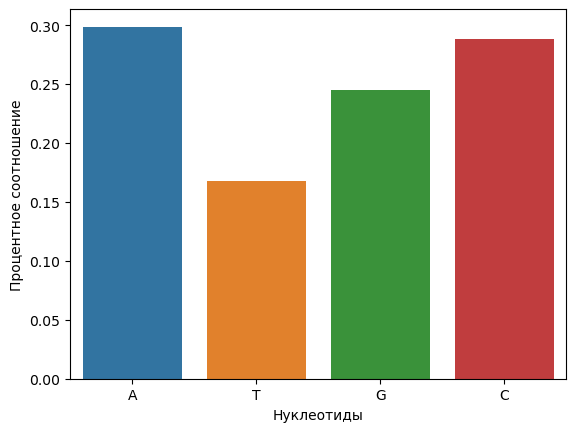

In [42]:
nucleotides = ['A', 'T', 'G', 'C']
sns_plot = sns.barplot(nucleotides, nucleotide_list)
sns_plot.set(xlabel='Нуклеотиды', ylabel='Процентное соотношение')

In [43]:
good_start = ['ATG + TAG', 'ATG + TAA', 'ATG + TGA', 'GTG + TAG', 'GTG + TAA', 'GTG + TGA', 'TTG + TAG', 'TTG + TAA', 'TTG + TGA']

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
matrix = np.array([good_start, good_end])

/tmp/ipykernel_4819/3688848923.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matrix = np.array([good_start, good_end])


In [46]:
print(matrix)

[list(['ATG + TAG', 'ATG + TAA', 'ATG + TGA', 'GTG + TAG', 'GTG + TAA', 'GTG + TGA', 'TTG + TAG', 'TTG + TAA', 'TTG + TGA'])
 list(['TAG', 'TAA', 'TGA'])]


In [47]:
plt.show(matrix)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [48]:
import seaborn as sns

/home/ars1suhod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


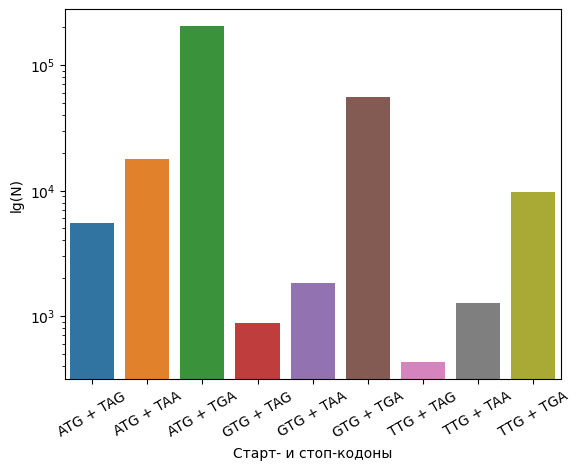

In [49]:
sns_plot = sns.barplot(good_start, list_start)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(),rotation = 30)
sns_plot.set(xlabel='Старт- и стоп-кодоны', ylabel='lg(N)')
plt.yscale('log')

строим гистограмму по пересечениям

In [ ]:
len_dict = {}
сount_good_intersections = 0
count_bad_intersections = 0
with open('/home/ars1suhod/ncbi/stats.tsv', 'wt') as out_file:
    os.chdir('/home/ars1suhod/ncbi/genomes')
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
        for directory in dirs:
            try:
                #print(directory)
                file = directory + '/' + directory + '_intersection.tsv'
                bsubt = pd.read_csv(file, delimiter='\t', header = None)
                sequence_dict = {}
                full_dict = {}
                full_sequence_dict = {}
                for i in range(len(bsubt)):
                    count_bad_intersections += 1
                    gene = bsubt[0][i]
                    sequence = bsubt[2][i]
                    num = len(sequence)
                    start = sequence[20:23]
                    end = sequence[num - 23: num - 20]
                    if (start in good_start and end in good_end):
                        сount_good_intersections += 1
                        intersection = sequence[20:num - 20]
                        sequence_dict.setdefault(intersection, [])
                        sequence_dict[intersection].append(gene)
                        full_dict[gene] = bsubt[1][i]
                        full_sequence_dict[gene] = sequence
                for key in sequence_dict.keys():
                    len_dict.setdefault(key, 0)
                    len_dict[key] += len(sequence_dict[key])
            except Exception:
                continue
print(сount_good_intersections)
print(count_bad_intersections)

In [ ]:
print(len_dict)

In [ ]:
import seaborn as sns

In [ ]:
print(list(len_dict))

In [ ]:
x = list(len_dict.keys())[0:10]
y = list(len_dict.values())[0:10]
print(x)
print(y)
sns_plot = sns.barplot(x, y)
plt.xticks(rotation=30)
plt.yscale('log')
sns_plot.set(xlabel='Пересечение', ylabel='lg(N)')
fig = sns_plot.get_figure()

Запись статистики

In [ ]:
with open('/home/ars1suhod/ncbi/stats.tsv', 'wt') as out_file:
    os.chdir('/home/ars1suhod/ncbi/genomes')
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
        for directory in dirs:
            try:
                print(directory)
                file = directory + '/' + directory + '_intersection.tsv'
                bsubt = pd.read_csv(file, delimiter='\t', header = None)
                sequence_dict = {}
                full_dict = {}
                full_sequence_dict = {}
                for i in range(len(bsubt)):
                    gene = bsubt[0][i]
                    sequence = bsubt[2][i]
                    num = len(sequence)
                    start = sequence[20:23]
                    end = sequence[num - 23: num - 20]
                    if (start in good_start and end in good_end):
                        intersection = sequence[20:num - 20]
                        sequence_dict.setdefault(intersection, [])
                        sequence_dict[intersection].append(gene)
                        full_dict[gene] = bsubt[1][i]
                        full_sequence_dict[gene] = sequence
                len_dict = {}
                out_file.write('\n')
                out_file.write(directory)
                out_file.write('\n')
                for key in sequence_dict.keys():
                    len_dict[key] = len(sequence_dict[key])
                    out_file.write(str(key) + '\t')
                out_file.write('\n')
                for key in sequence_dict.keys():
                    out_file.write(str(len_dict[key]) + '\t')
                out_file.write('\n')
            except Exception:
                continue

In [ ]:
count_genes = 0
for root, dirs, files in os.walk('/home/ars1suhod/ncbi/genomes'):
    for directory in dirs:
        os.chdir('/home/ars1suhod/ncbi/genomes/' + directory)
        for root_new, dirs_new, files_new in os.walk('/home/ars1suhod/ncbi/genomes/' + directory):
            for filename in files_new:
                if('cds' in filename):
                    with open (filename, 'r') as cds_file:
                        for line in cds_file:
                            if 'lcl' in line:
                                count_genes += 1
        os.chdir('/home/ars1suhod/ncbi/genomes/')

In [ ]:
print(count_genes)

In [ ]:
print(сount_good_intersections/count_genes * 100)
print(count_bad_intersections/count_genes * 100)